### Problem description

Below are 3 representations of the same model — mathematical, directed graph, factor graph. Use any of these representations to generate and plot random samples from the complete state of the model. The complete state of the model contains the position, velocity and GPS measurement at every point in time.

See the example code at the bottom of the notebook to get you started. There are some specific tasks to do and questions to answer there.

### Mathematical definition

Notation:
* $x_t$ — position at time $t$
* $v_t$ — velocity at time $t$
* $y_t$ — GPS measurement at time $t$
* with $t=0, 1, \ldots, T$

Initial state:
* Position: $x_0 \sim \text{Normal}(\mu_{x_0}, \sigma_{x_0}^2)$
* Velocity: $v_0 \sim \text{Normal}(\mu_{v_0}, \sigma_{v_0}^2)$

State update equations:
* Position: $x_{t+1} \sim \text{Normal}(x_t + v_t, \sigma_x^2)$
* Velocity: $v_{t+1} \sim \text{Normal}(v_t, \sigma_v^2)$

Measurement equation:
* $y_{t} \sim \text{Normal}(x_t, \sigma_y^2)$

### Directed graph

<img src="https://course-resources.minerva.kgi.edu/uploaded_files/mke/00083623-2880/8.1-directed-graph.png">

### Factor graph

<img src="https://course-resources.minerva.kgi.edu/uploaded_files/mke/00083624-6651/8.1-factor-graph.png">

In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

# We use the parameter values below for this activity. Units are shown in square brackets.

T = 60                # Track for 1 minute. [s]
mu_x0 = sigma_x0 = 0  # Set the initial position to 0 so that all our plots start
                      # from the same point. [m]
mu_v0 = 0             # The initial velocity is centered on 0 since we don't know
                      # in which direction (positive or negative) cars are traveling. [m/s]
sigma_v0 = 13         # This puts our initial speed below the speed limit (approx.
                      # 33.3m/s or 120km/h or 75mph) with 99% probability.
                      # Speed limits vary by country. [m/s]
sigma_x = 1           # How much our position can vary around adding the velocity to
                      # the previous position. [m]
sigma_v = 1.5         # How much the velocity changes per second. Full acceleration
                      # for an average car is 3–4 m/s². This value means we accelerate
                      # less than 3m/s² about 95% of the time. [m/s²]
sigma_y = 5           # The given GPS measurement error. [m]

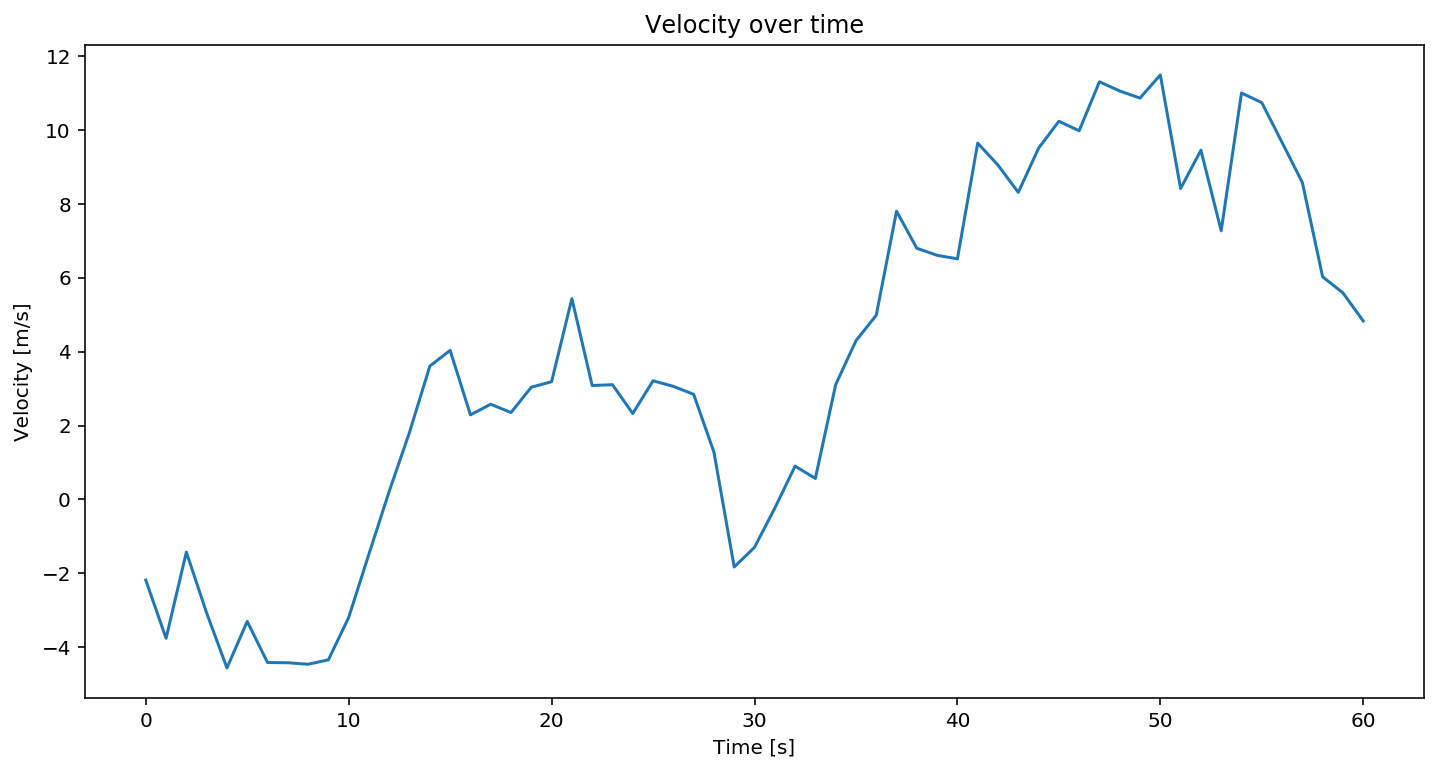

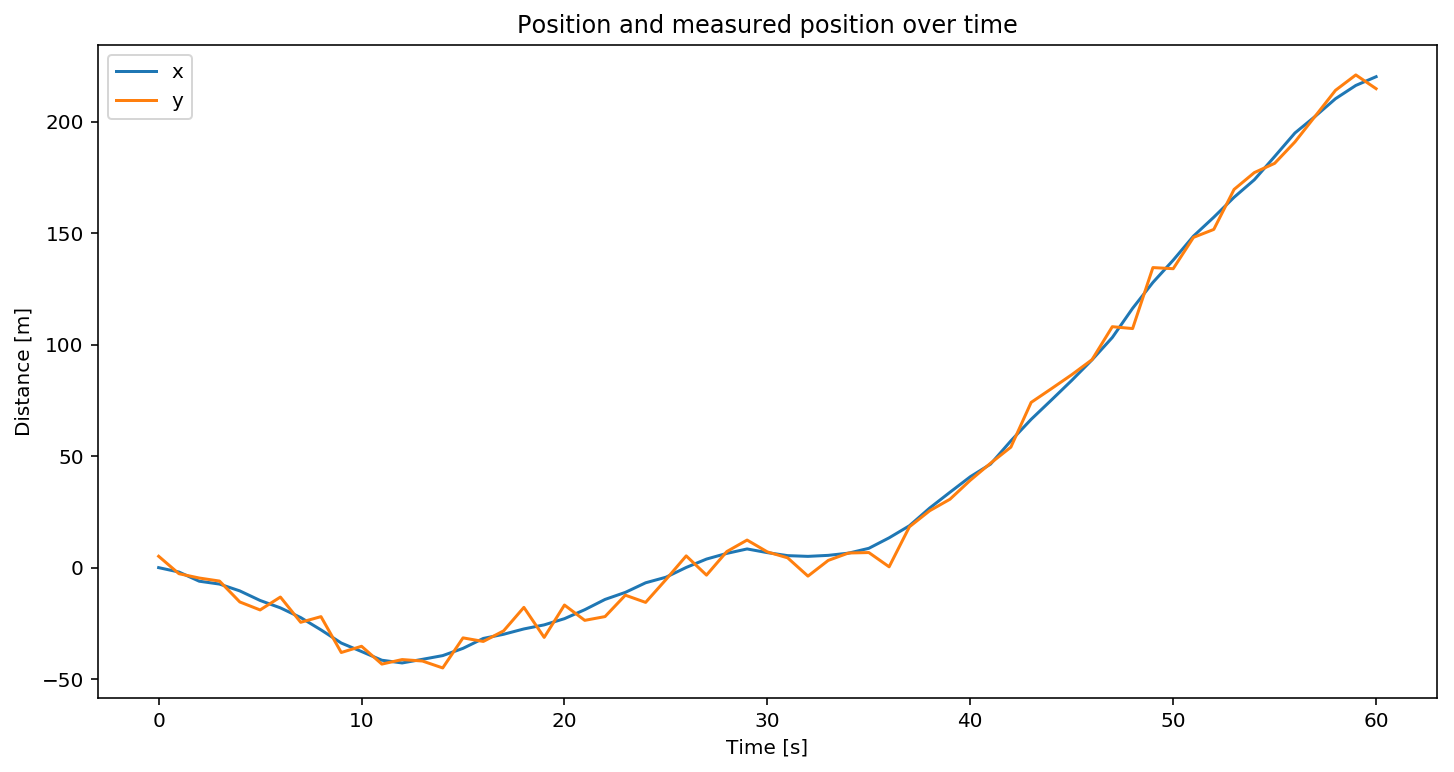

In [2]:
# Here is how to sample the initial position and velocity.
x0 = sts.norm(mu_x0, sigma_x0).rvs()
v0 = sts.norm(mu_v0, sigma_v0).rvs()

x = [x0]
v = [v0]
for t in range(1, T+1):
    # Now you have to sample the position and velocity at each time.
    x.append(sts.norm(x[t-1] + v[t-1], sigma_x).rvs())
    v.append(sts.norm(v[t-1], sigma_v).rvs())

# Once we have all the position variables, we can sample the
# measurement variables simultaneously.
y = sts.norm.rvs(x, sigma_y, size=T+1)

#
# QUESTION 1:
# Why can we sample all the measurement variables simultaneously?
#
# From the directed graph we can see that each of the y_i depend only on its
# corresponding x_i. SciPy allows us to draw a random sample from normal distributions
# with different means by passing a vector as the mean argument in sts.norm.rvs().


# Plot the velocity over time
plt.figure(figsize=(12, 6))
plt.plot(range(T+1), v)
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.title('Velocity over time')

# Plot the position and measurements over time
plt.figure(figsize=(12, 6))
plt.plot(range(T+1), x, label='x')
plt.plot(range(T+1), y, label='y')
plt.title('Position and measured position over time')
plt.xlabel('Time [s]')
plt.ylabel('Distance [m]')
plt.legend()
plt.show()

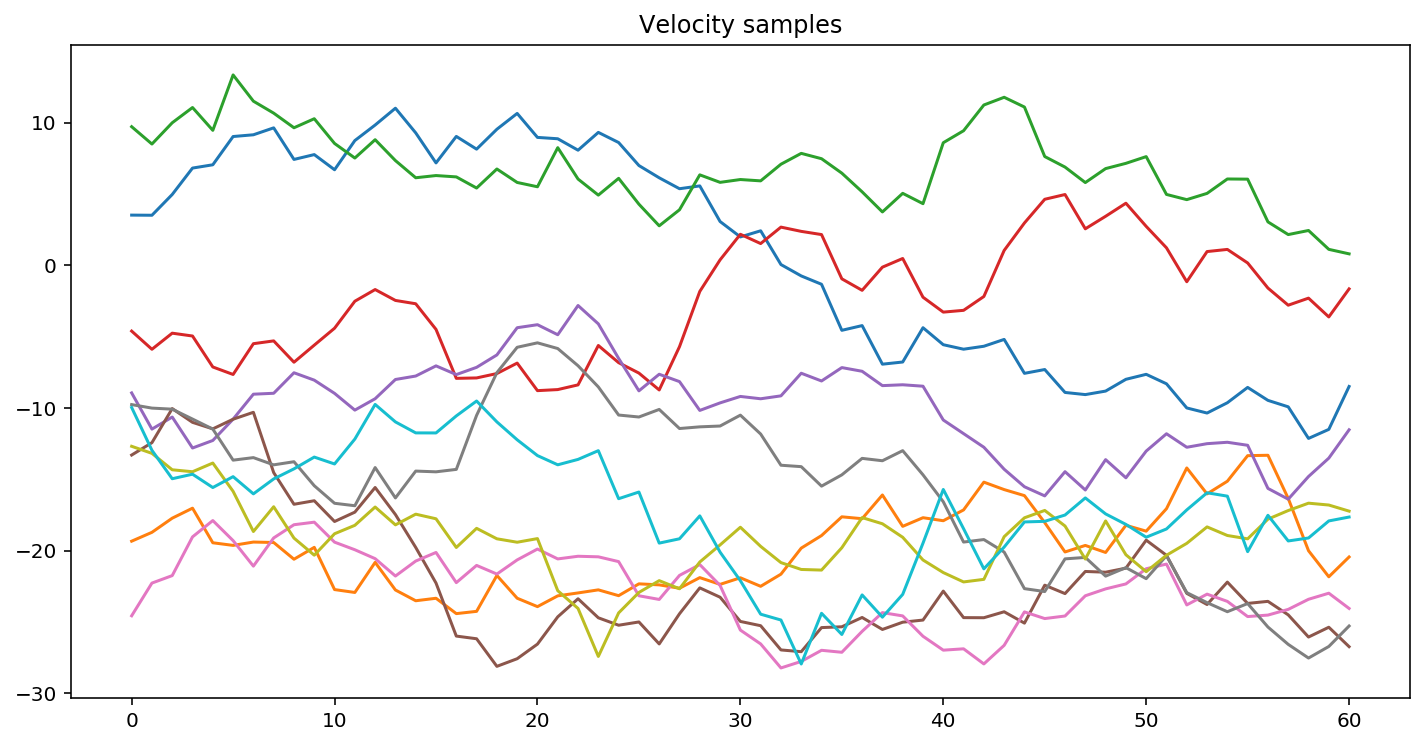

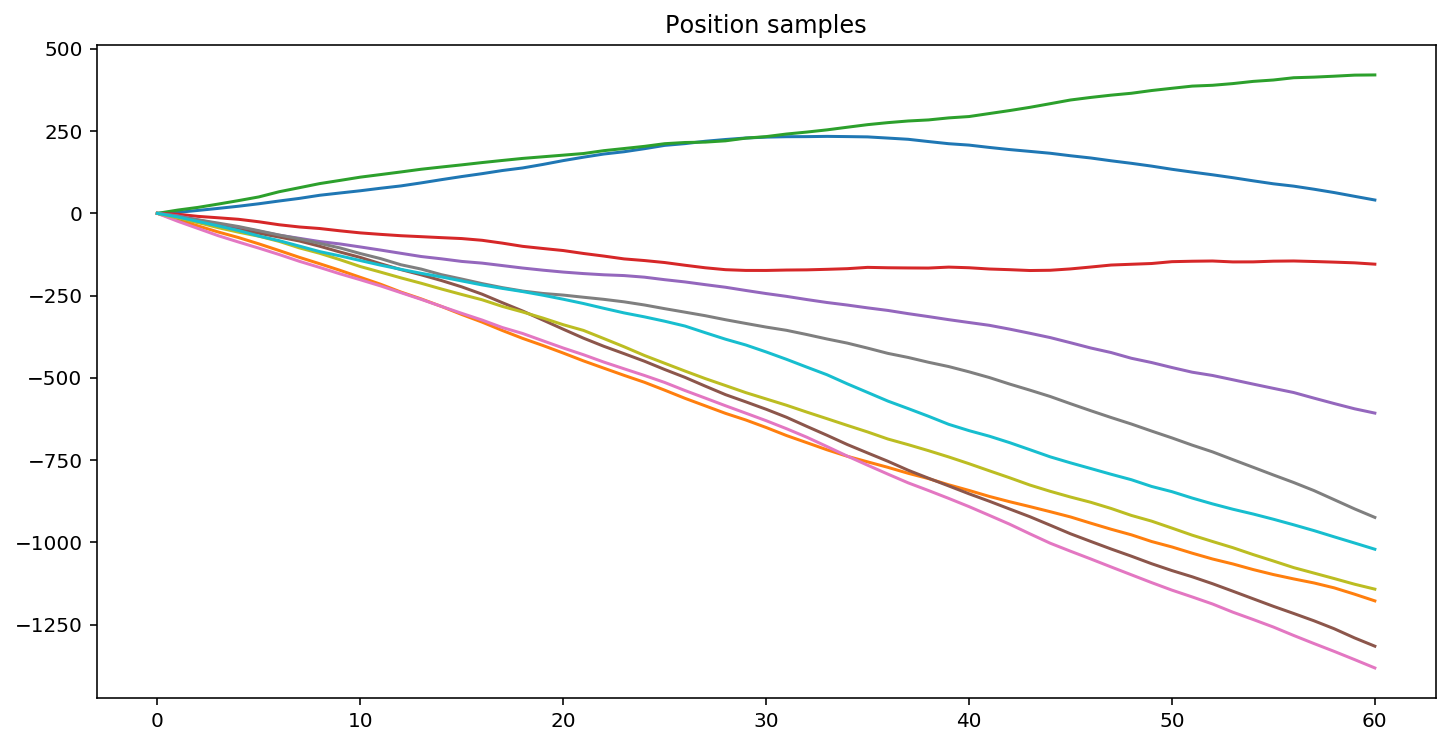

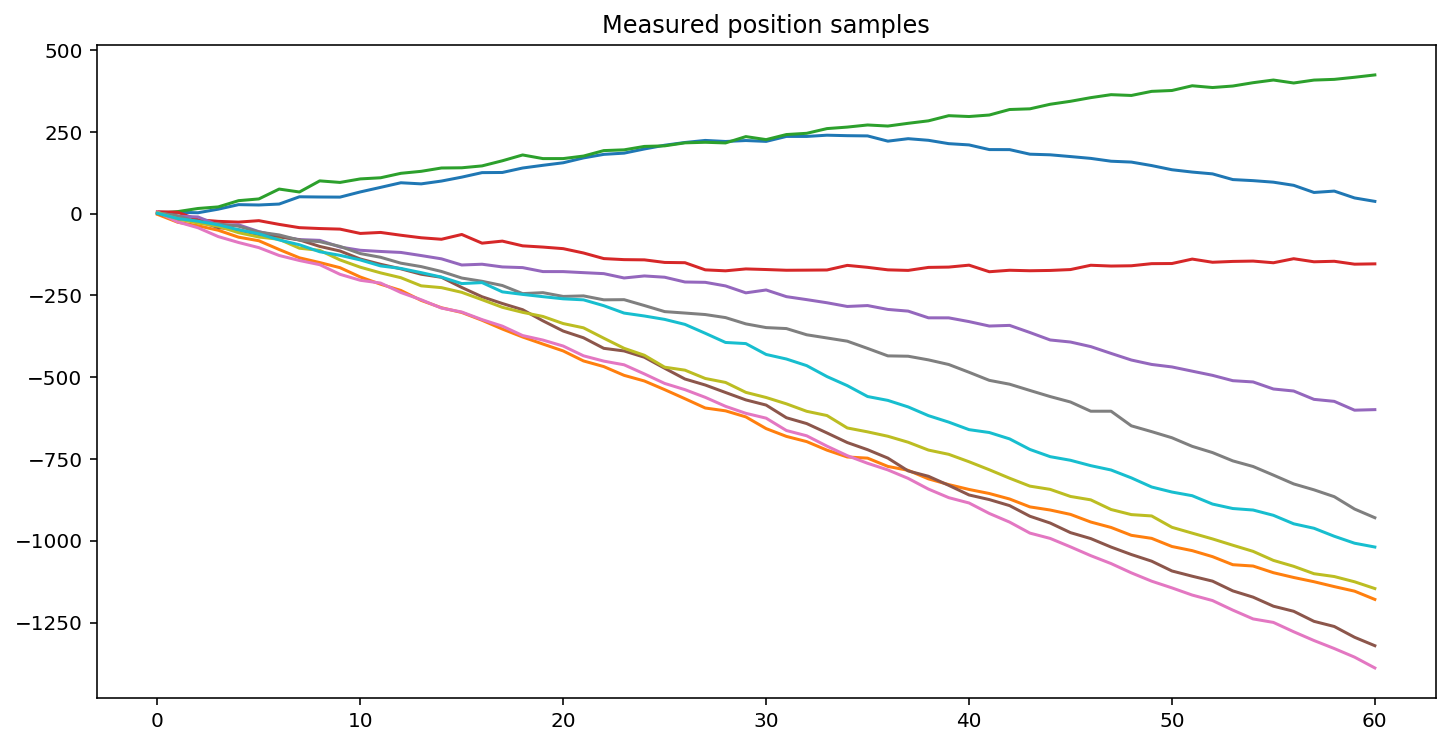

In [3]:
#
# TASK 2:
# Generate 10 different samples of the complete state of the model and
# plot the 10 samples.
#
#  * Use one plot for the 10 velocity samples,
#  * one plot for the 10 position samples, and
#  * one plot for the 10 measurement samples.
#
# Remember that 1 sample contains the position, velocity and measurements
# for all time values.

N = 10  # number of samples

v = np.zeros((N, T+1))
x = np.zeros((N, T+1))
y = np.zeros((N, T+1))

v[:,0] = sts.norm.rvs(mu_v0, sigma_v0, size=N)
x[:,0] = sts.norm.rvs(mu_x0, sigma_x0, size=N)
y[:,0] = sts.norm.rvs(x[:,0], sigma_y, size=N)

for t in range(1, T+1):
    v[:,t] = sts.norm.rvs(v[:,t-1], sigma_v, size=N)
    x[:,t] = sts.norm.rvs(x[:,t-1] + v[:,t-1], sigma_x, size=N)
    y[:,t] = sts.norm.rvs(x[:,t], sigma_y, size=N)

plt.figure(figsize=(12, 6))
plt.plot(range(T+1), v.transpose())
plt.title('Velocity samples')

plt.figure(figsize=(12, 6))
plt.plot(range(T+1), x.transpose())
plt.title('Position samples')

plt.figure(figsize=(12, 6))
plt.plot(range(T+1), y.transpose())
plt.title('Measured position samples')

plt.show()